<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.1 KB
Summary Statistics:
        fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
count      11933.000000   11933.000000               11933.000000   
mean          35.954215      27.128244     

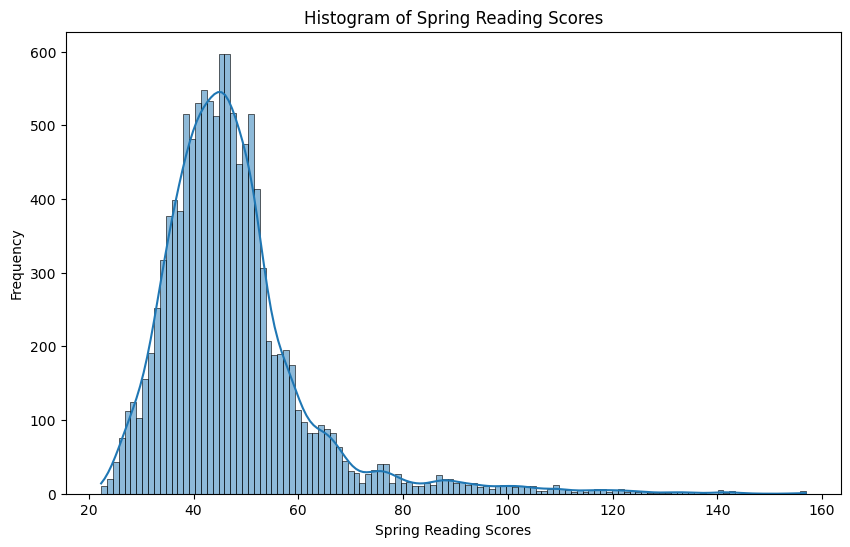

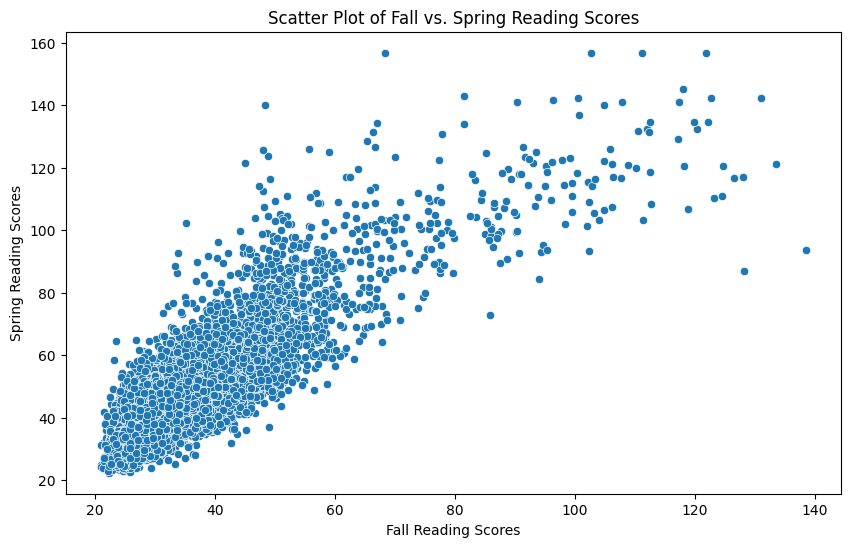

Correlation Matrix:
                              fallreadingscore  fallmathscore  \
fallreadingscore                     1.000000       0.705691   
fallmathscore                        0.705691       1.000000   
fallgeneralknowledgescore            0.487655       0.605225   
springreadingscore                   0.831675       0.661279   
springmathscore                      0.631966       0.824326   
springgeneralknowledgescore          0.471963       0.584103   
totalhouseholdincome                 0.297376       0.338133   
incomeinthousands                    0.297376       0.338133   
incomegroup                          0.279131       0.320123   

                             fallgeneralknowledgescore  springreadingscore  \
fallreadingscore                              0.487655            0.831675   
fallmathscore                                 0.605225            0.661279   
fallgeneralknowledgescore                     1.000000            0.442213   
springreadingscore        

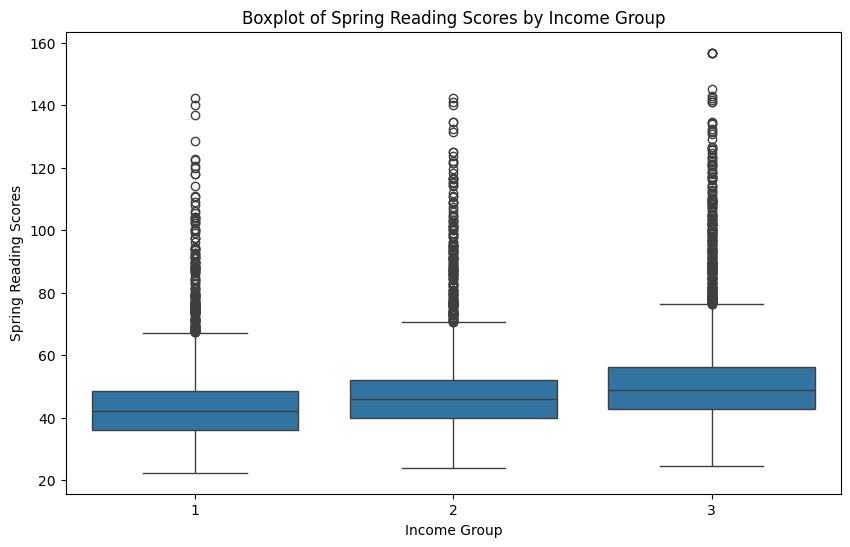

             Source            SS     DF             F     p-unc      np2
0       incomegroup  5.131201e+02      2      4.055660  0.017348  0.00068
1  fallreadingscore  1.547042e+06      1  24455.397576  0.000000  0.67214
2          Residual  7.546256e+05  11929           NaN       NaN      NaN
          Source            SS     DF             F         p-unc       np2
0    incomegroup  1.712758e+03      2     18.523585  9.284861e-09  0.003096
1  fallmathscore  1.026489e+06      1  22203.081238  0.000000e+00  0.650505
2       Residual  5.514994e+05  11929           NaN           NaN       NaN
             Source            SS     DF             F     p-unc      np2
0       incomegroup  5.131201e+02      2      4.055660  0.017348  0.00068
1  fallreadingscore  1.547042e+06      1  24455.397576  0.000000  0.67214
2          Residual  7.546256e+05  11929           NaN       NaN      NaN
                            OLS Regression Results                            
Dep. Variable:     spring

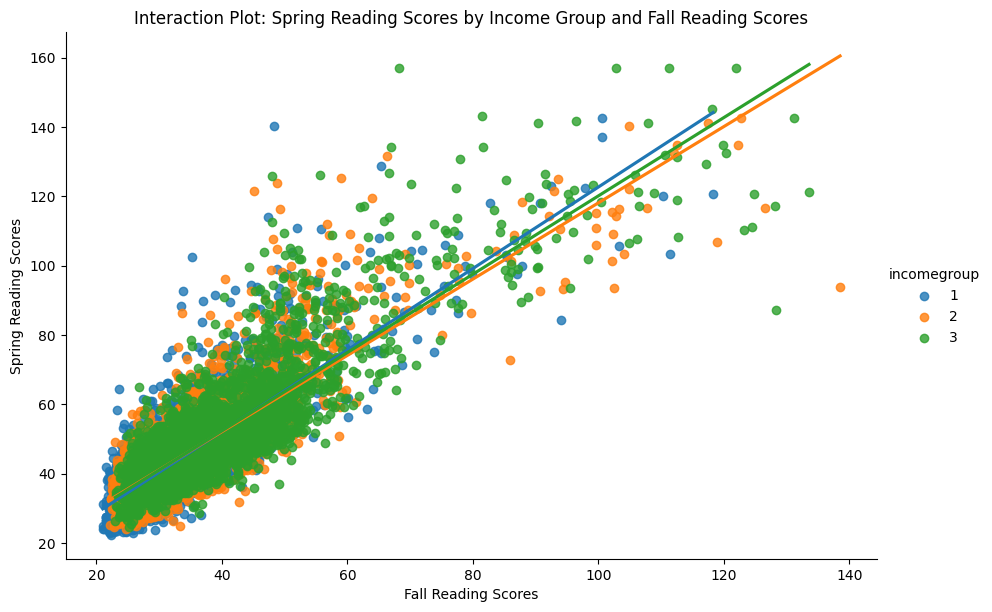

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
%pip install pingouin
from pingouin import ancova

# load data file
df = pd.read_csv("INF2178_A3_data.csv")

# Data Cleaning and Exploration:

# Handling Missing Values:
# Check for missing values in the dataset
df.isnull().sum()

# Ensuring Data Consistency:
# Confirm consistency in variable names, units, and formats
df.info()

# Handling Duplicates:
# Check for and remove duplicate rows in the dataset
data_cleaned = df.drop_duplicates()

In [ ]:
# Data Exploration:

# Descriptive Statistics:
# Compute summary statistics for numerical variables
summary_statistics = df.describe()
print("Summary Statistics:\n", summary_statistics)

# Visualization:
# Create visualizations such as histograms, boxplots, and scatter plots
plt.figure(figsize=(10, 6))
sns.histplot(df['springreadingscore'], kde=True)
plt.title("Histogram of Spring Reading Scores")
plt.xlabel("Spring Reading Scores")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fallreadingscore', y='springreadingscore')
plt.title("Scatter Plot of Fall vs. Spring Reading Scores")
plt.xlabel("Fall Reading Scores")
plt.ylabel("Spring Reading Scores")
plt.show()

# Correlation Analysis:
# Calculate correlations between variables
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Group Comparisons:
# Compare the distribution of scores across different income groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='incomegroup', y='springreadingscore')
plt.title("Boxplot of Spring Reading Scores by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Spring Reading Scores")
plt.show()

In [ ]:
# Running ANCOVA for spring reading scores
ancova_reading = ancova(data=df, dv='springreadingscore', covar='fallreadingscore', between='incomegroup')
print(ancova_reading)

# Running ANCOVA for spring math scores
ancova_math = ancova(data=df, dv='springmathscore', covar='fallmathscore', between='incomegroup')
print(ancova_math)

# ANCOVA using statsmodels
model = ols('springreadingscore ~ fallreadingscore + C(incomegroup)', data=df).fit()
print(model.summary())

# Fit ANCOVA model with interaction term
model_interaction = sm.formula.ols('springreadingscore ~ fallreadingscore * C(incomegroup)', data=df).fit()
print(model_interaction.summary())

In [ ]:
# Interaction Plot
interaction_plot = sns.lmplot(x='fallreadingscore', y='springreadingscore', hue='incomegroup', data=df, ci=None, height=6, aspect=1.5)
interaction_plot.set_axis_labels("Fall Reading Scores", "Spring Reading Scores")
interaction_plot.set(title="Interaction Plot: Spring Reading Scores by Income Group and Fall Reading Scores")
plt.show()